In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#for the map
#geo pandas, store in dataframe but it is geo referenced to right places
# we can do this to try and predict good / bad air quality index for places in the united states 
# based on our model this is so interesting , we can also maybe try and look it at other
# have county codes and predictions, geo reference data frame that makes map, combine on county codes 

## What We can Learn from the Following / Reasoning behind it all: Logistic Regression

Step one was cleaning the data; getting a binary AQI value for our training data, using logistic regression here to begin. Dropping all of the values that play into total AQI as well as categorical data such as state, county, and city. Looking at exclusively different race percentages and household income. 

When we tested for feature importance in Logistic Regression, Household income had the biggest impact. This means we should be looking at household income as it relates to urban pollution, as well as the next most important factors which were state code, county code, total population, percent male, percent female, and then percentages of white alone. 

I also dropped non-city data to specifically look at urban pollution. 

Going to continue by looking at what happens with different models. 

In [5]:
#place holder until we get dataset ready

data = pd.read_csv("pollution_income_race.csv")

data = data[data["City"] != "Not in a city"]

data["AQI Binary"] = 1 * (data["AQI Total"] <= 100)

#our labels are the AQI Binary for now
y = data.loc[:,"AQI Binary"]

#also going to drop states and cities for now, (and city) because we don't get a numerical from that
data = data.drop(columns=["State_x", 
                          "County_x",
                          "City",
                           "State_y", 
                          "County_y", 
                          "AQI Total", 
                          "AQI Binary"])

#finally, drop those features that directly contribute to AQI (i.e. NO2 Mean, NO2 1st Max Value)
data = data.drop(columns=["NO2 Mean",
                         "NO2 1st Max Value",
                         "NO2 1st Max Hour",
                         "NO2 AQI",
                         "O3 Mean",
                         "O3 1st Max Value",
                         "O3 1st Max Hour",
                         "O3 AQI",
                         "SO2 Mean",
                         "SO2 1st Max Value",
                         "SO2 1st Max Hour",
                         "SO2 AQI",
                         "CO Mean",
                         "CO 1st Max Value",
                         "CO 1st Max Hour",
                         "CO AQI"])

#train and test data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [6]:
#feature importance
X_train

,State Code,County Code,Date Local,Median Household Income,Total Pop,Total Male %,Total Female %,White Alone (M) %,White Alone (F) %,Black Alone (M) %,Black Alone (F) %,Am Indian+AK Native Alone (M) %,Am Indian+AK Native Alone (F) %,Asian Alone (M) %,Asian Alone (F) %,Nat. HI and PI (M) %,Nat. HI and PI (F) %,TOM_MALE
66,6,1,2002,113518.0,10021506,0.495390,0.504610,0.244432,0.238668,0.051896,0.056041,0.005613,0.005458,0.161241,0.171451,0.004578,0.004916,0.027631
835,32,3,2001,62496.0,13662646,0.500808,0.499192,0.349270,0.334776,0.065935,0.068644,0.006304,0.006135,0.048658,0.058518,0.004651,0.004758,0.025988
67,6,1,2003,113518.0,10021506,0.495390,0.504610,0.244432,0.238668,0.051896,0.056041,0.005613,0.005458,0.161241,0.171451,0.004578,0.004916,0.027631
447,6,95,2001,83678.0,2716962,0.501149,0.498851,0.300509,0.288954,0.074948,0.072824,0.006718,0.006442,0.076265,0.088328,0.005441,0.005261,0.037269
217,6,37,2012,75624.0,59665436,0.495714,0.504286,0.353743,0.349500,0.042930,0.046823,0.007591,0.007220,0.073381,0.082331,0.001828,0.001838,0.016241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,42,69,2002,56911.0,1294150,0.489517,0.510483,0.437606,0.461313,0.024152,0.021254,0.001740,0.001697,0.016049,0.016100,0.000323,0.000383,0.009646
1184,42,101,2005,55102.0,9562106,0.475856,0.524144,0.218985,0.226435,0.200090,0.235551,0.004473,0.004774,0.037813,0.041240,0.000867,0.000898,0.013629
1219,42,133,2000,71655.0,2743046,0.497499,0.502501,0.438321,0.443527,0.037588,0.036162,0.002079,0.001843,0.007190,0.008613,0.000395,0.000416,0.011926
924,36,103,2002,109084.0,9152726,0.495513,0.504487,0.416442,0.422438,0.043497,0.045976,0.003550,0.003241,0.021259,0.022082,0.000557,0.000519,0.010207


In [7]:
y_train

#making y_train into categorical (good, bad) for now. 1 is good, 0 is worst
#using threshold from epa.gov: 100 and below gets 1, 101 and above gets 0


66      1
835     1
67      1
447     1
217     1
       ..
1133    1
1184    1
1219    1
924     1
1215    1
Name: AQI Binary, Length: 858, dtype: int64

In [8]:
X_train.columns.values.tolist()

['State Code',
 'County Code',
 'Date Local',
 'Median Household Income',
 'Total Pop',
 'Total Male %',
 'Total Female %',
 'White Alone (M) %',
 'White Alone (F) %',
 'Black Alone (M) %',
 'Black Alone (F) %',
 'Am Indian+AK Native Alone (M) %',
 'Am Indian+AK Native Alone (F) %',
 'Asian Alone (M) %',
 'Asian Alone (F) %',
 'Nat. HI and PI (M) %',
 'Nat. HI and PI (F) %',
 'TOM_MALE']

In [9]:
data.dtypes

State Code                           int64
County Code                          int64
Date Local                           int64
Median Household Income            float64
Total Pop                            int64
Total Male %                       float64
Total Female %                     float64
White Alone (M) %                  float64
White Alone (F) %                  float64
Black Alone (M) %                  float64
Black Alone (F) %                  float64
Am Indian+AK Native Alone (M) %    float64
Am Indian+AK Native Alone (F) %    float64
Asian Alone (M) %                  float64
Asian Alone (F) %                  float64
Nat. HI and PI (M) %               float64
Nat. HI and PI (F) %               float64
TOM_MALE                           float64
dtype: object

<BarContainer object of 5 artists>

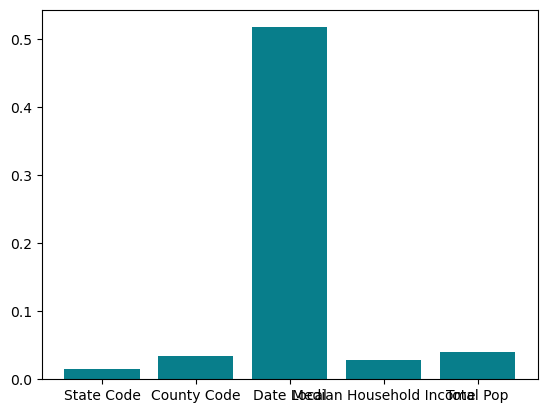

In [15]:
#try feature importance w Logistic Regression
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)


#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': RF.feature_importances_
                           })

importances.sort_values('Importance')

importances = importances[0:5]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

<BarContainer object of 5 artists>

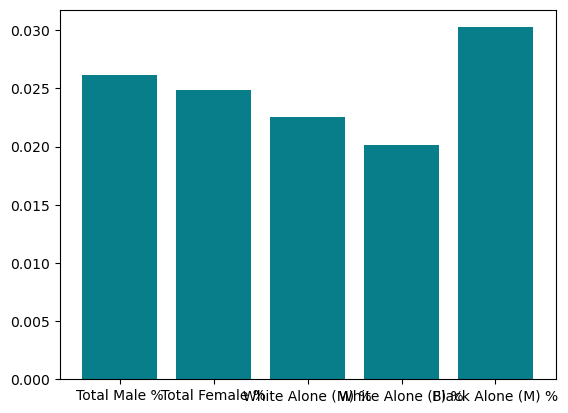

In [18]:
#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': RF.feature_importances_
                           })

importances.sort_values('Importance')

importances = importances[5:10]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

### to note: 

negative feature importance means that feature actually increases our loss (so % Black alone (M) actually increases the loss of our feature).

<BarContainer object of 4 artists>

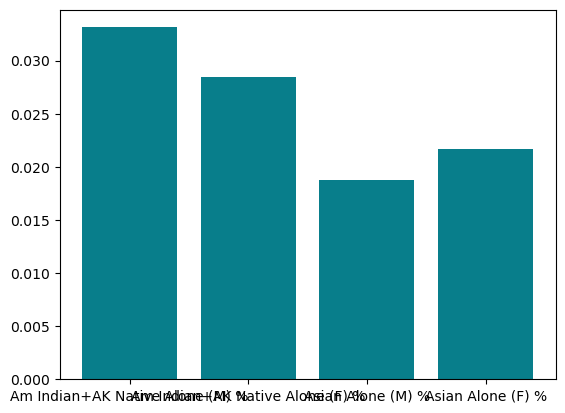

In [20]:
#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': RF.feature_importances_
                           })

importances.sort_values('Importance')

importances = importances[11:15]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

<BarContainer object of 3 artists>

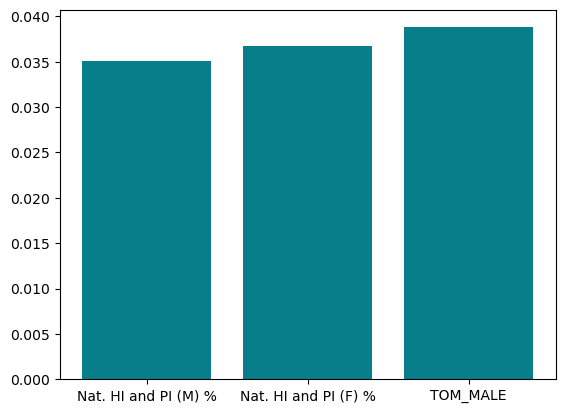

In [21]:
#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': RF.feature_importances_
                           })

importances.sort_values('Importance')

importances = importances[15:20]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

## Looking into models 

Starting with some of the basic scie kit learn models to compare. Depending on how they do I think we could have a binary classifier type model and then attempt linear regression to predict actual values which might not work as well on our data. 

### Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression 

LR = LogisticRegression()
LR.fit(X_train, y_train)

print("Training Accuracy:")
print(LR.score(X_train, y_train))

print("Testing Accuracy:")
print(LR.score(X_test, y_test))

Training Accuracy:
0.8916083916083916
Testing Accuracy:
0.8605200945626478


### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
from scipy import stats

LinR = LinearRegression()
LinR.fit(X_train, y_train)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

print(LinR.score(X_train,y_train))
print(LinR.score(X_test, y_test))

                            OLS Regression Results                            
Dep. Variable:             AQI Binary   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     15.02
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.74e-36
Time:                        09:35:57   Log-Likelihood:                -107.15
No. Observations:                 858   AIC:                             248.3
Df Residuals:                     841   BIC:                             329.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Logistic Regression with polynomial features 
code for poly_LR from class notes. Doesn't seem to be working since identical to normal LR training score and the score doesn't change from degree = 1 to degree = 2 but unsure why. 

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def poly_LR(degree, **kwargs):
    plr = Pipeline([("poly", PolynomialFeatures(degree = degree)),
                    ("LR", LogisticRegression(**kwargs))])
    return plr

    
plr = poly_LR(degree = 2, max_iter = 1000000)
plr.fit(X_train, y_train)
print("Training accuracy")
print(plr.score(X_train, y_train))

print("Testing accuracy")
print(plr.score(X_test, y_test))

Training accuracy
0.8916083916083916
Testing accuracy
0.8605200945626478


In [ ]:
# coefficients -- wanted to see what this looks like, they're all very small coefficients maybe that has 
#something to do with how low the degrees change the accuracy? 
print("coefficients of model:")
print()
print(plr.named_steps['LR'].coef_)

print("biases of model:")
print(plr.named_steps['LR'].intercept_)

### Support Vector Machine

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(gamma = "auto") 
svc.fit(X_train, y_train)

print("Training Accuracy:")
print(svc.score(X_train, y_train))

print("Test accuracy")
print(svc.score(X_test, y_test))

Training Accuracy:
0.9463869463869464
Test accuracy
0.9054373522458629


In [21]:
best_score = -np.inf
best_gamma = np.inf

for gammas in 6**(np.arange(-4,4, dtype = float)):
    svc = SVC(gamma = gammas)
    scores = cross_val_score(svc, X_train, y_train,cv=8)
    if scores.mean()>best_score:
        best_score = scores.mean()
        best_gamma = gammas
        
print(best_score, best_gamma)


    

0.9114096573208723 0.027777777777777776


In [22]:
svc_model = SVC(gamma = .027777777777777776)
svc_model.fit(X_train,y_train)

print("training accuracy")
print(svc_model.score(X_train,y_train))
print("testing")
print(svc_model.score(X_test,y_test))

training accuracy
0.9358974358974359
testing
0.9054373522458629


### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

best_score = -np.inf
maximum = 0

for depth in range(2,25):
    tree = DecisionTreeClassifier(max_depth = depth)
    #scores = cross_val_score(tree, X_train[subset], y_train, cv = 11)

    scores = cross_val_score(tree, X_train, y_train, cv = 9)
    if scores.mean() > best_score:
        best_score = scores.mean()
        maximum = depth
print(best_score, maximum)

0.898525828460039 5


In [24]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train,y_train)
print("training")
print(tree.score(X_train,y_train))
print("testing")
print(tree.score(X_test,y_test))

training
0.9335664335664335
testing
0.900709219858156


## working with geopandas, or trying to 


In [26]:
#have to pip install folium, mapclassify, geopandas, matplotlib

import geopandas as gpd
import folium
import mapclassify
import matplotlib.pyplot as plt

In [27]:
geo_data = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

geo_data.id = geo_data.id.astype(str).astype(int)

geo_data

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


In [29]:
#county code and state codes are the same in the two data frames

#print(data.loc[data['County Code'] == 33])
#print(geo_data.loc[geo_data['COUNTY'] == '033'])

#shifting state/county codes from objects to integers

print(geo_data.dtypes)

geo_data['COUNTY'] = geo_data.COUNTY.astype(str).astype(int)
geo_data['STATE'] = geo_data.STATE.astype(str).astype(int)

print(geo_data.dtypes)

id               int64
GEO_ID          object
STATE            int64
COUNTY           int64
NAME            object
LSAD            object
CENSUSAREA     float64
geometry      geometry
dtype: object
id               int64
GEO_ID          object
STATE            int64
COUNTY           int64
NAME            object
LSAD            object
CENSUSAREA     float64
geometry      geometry
dtype: object


<Axes: >

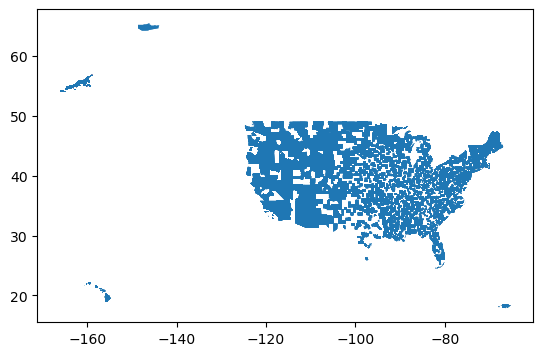

In [30]:
# trying to merge the two data sets
merged_df = pd.merge(geo_data, data, left_on='COUNTY', right_on='County Code')

merged_df.plot()

## Mapping test data (AQI Binary)

merging our X_test, y_test with the geodata. Trying to make chloropleth map. 

<Axes: >

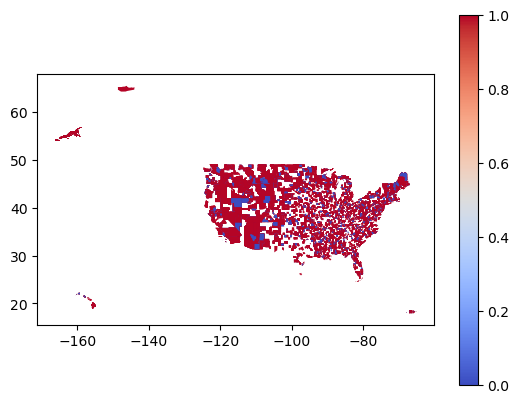

In [35]:
#want to map the actual and predicted AQI for the test data 


test_merge = X_test 
test_merge["AQI Binary"] = y_test

test_merge = pd.merge(geo_data, X_test, left_on='COUNTY', right_on='County Code', how = "right")

fig, ax = plt.subplots(1, 1)
test_merge.plot(column="AQI Binary", ax=ax, legend=True, cmap="coolwarm")




In [ ]:
geo_data.explore() 